In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output

In [41]:
img = Image.open('pigs.jpg').convert('LA')
img = np.array(img)

In [42]:
size = (32,32)
cimg = img[:500,350:850][:,:,0]
crimg = Image.fromarray(cimg).resize(size)
crimg = np.array(crimg, dtype=float)/256
crimg.shape

(32, 32)

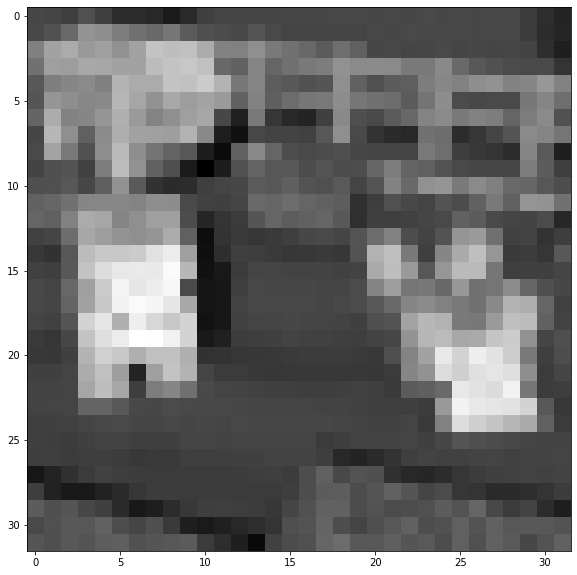

In [44]:
image = crimg
plt.figure(figsize=(10,10))
plt.imshow(image, 'gray')

# Theory
Image graph partitionong.
1. Find weights for all edges using (18) and build the
L matrix (7).
2. Choose the node of largest degree as the ground node, $v_g$,and determine $L_0$ and $d_0$ by eliminating the row/column corresponding to $v_g$.
3. Solve (13) for $x_0$.
4. Threshold the potentials x at the value that gives partitions
corresponding to the lowest isoperimetric ratio.
5. Continue recursion on each segment until the isoperimetric
ratio of the subpartitions is larger than the *stop* parameter.

**18:** $w_{ij} = exp(-\beta(I_i - I_j)^2)$  
**7:** $L_{v_i v_j} = \left\{
    \begin{array}{lr}
        d_i & if i == j\\
        -w(e_{ij}) & if e_{ij} \in E\\
        0 & otherwise
    \end{array}
\right.
$  

**13:** $L_0x_0 = d_0$

# Ideas for speedup
- Using hilbert curves for image unfoldong
- Using kernel method to compute W?

In [45]:
from modules import PIG 

## Step 1

In [48]:
%%time
graph = PIG(image, mode='usestop', verbose=True)


PIG initialization is done.
CPU times: user 944 ms, sys: 0 ns, total: 944 ms
Wall time: 944 ms


In [51]:
max_degree_idxs = np.where(
    graph.degree == graph.degree.max())

graph.degree

array([592.2724796 , 589.08369319, 569.91398731, ..., 592.2724796 ,
       557.07720852, 443.93644288])

(array([  14,   15,   16,   19,   21,   23,   25,   52,   57,   83,   86,
          89,   91,  202,  274,  313,  314,  315,  322,  331,  431,  525,
         526,  527,  542,  590,  609,  628,  742,  747,  777,  780,  781,
         782,  783,  784,  823,  930, 1020]),)

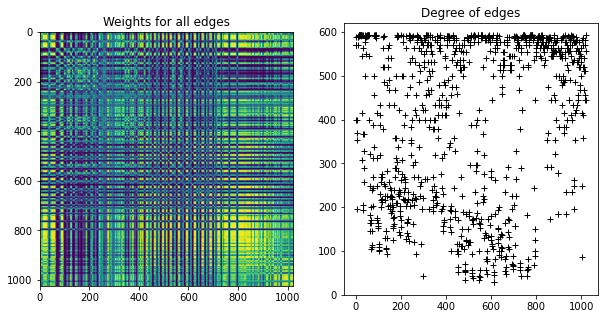

In [32]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('Weights for all edges')
ax[0].imshow(graph.weights)

ax[1].set_title('Degree of edges')
ax[1].plot(graph.degree, 'k+')
plt.show()

## Step 2
2. Choose the node of largest degree as the ground node, $v_g$,and determine $L_0$ and $d_0$ by eliminating the row/column corresponding to $v_g$.


In [33]:
print(f'Ground node: {graph.ground_node}')
print(f'Threshold  : {graph.threshold}')


Ground node: 0
Threshold  : 716.0548304273269


## Step 3

(1023,)


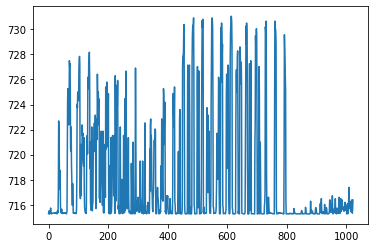

In [34]:
print(graph.x.shape)
plt.plot(graph.x)

## Step 4

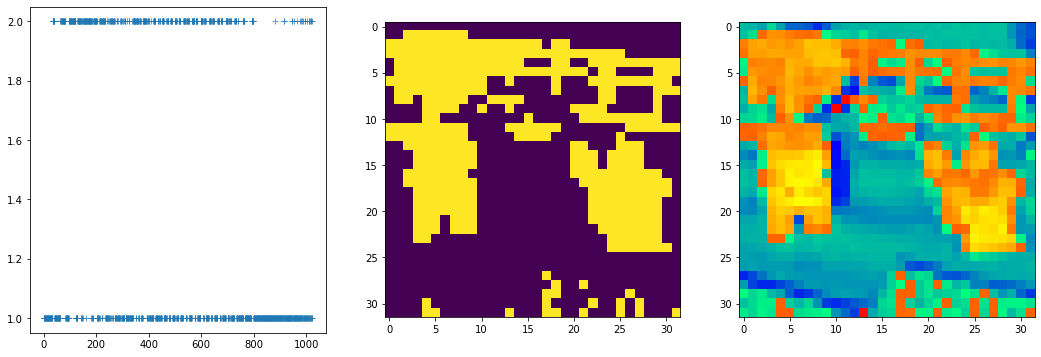

In [35]:
mask = graph.classes.reshape(
    (graph._width, graph._hight))

mm = 6
fig,ax = plt.subplots(1,3,figsize=(3*mm,1*mm))
ax[0].plot(graph.classes, '+', alpha=0.7)
ax[1].imshow(mask)
ax[2].imshow(np.ma.masked_where(mask==1, image), 'autumn')
ax[2].imshow(np.ma.masked_where(mask==2, image), 'winter')

